## 資料前處理

In [1]:
# 導入資料處理與可視化套件
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# 用pandas將資料讀進來並儲存成df
df = pd.read_csv('character-deaths.csv')
df

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,Zollo,None,NaN,NaN,NaN,21.0,1,0,0,0,1,0,0
913,Yurkhaz zo Yunzak,None,300.0,5.0,59.0,47.0,1,0,0,0,0,0,1
914,Yezzan Zo Qaggaz,None,300.0,5.0,57.0,25.0,1,1,0,0,0,0,1
915,Torwynd the Tame,Wildling,300.0,5.0,73.0,73.0,1,0,0,0,1,0,0


In [3]:
# 看df的資料型態以及有無空值
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                917 non-null    object 
 1   Allegiances         917 non-null    object 
 2   Death Year          305 non-null    float64
 3   Book of Death       307 non-null    float64
 4   Death Chapter       299 non-null    float64
 5   Book Intro Chapter  905 non-null    float64
 6   Gender              917 non-null    int64  
 7   Nobility            917 non-null    int64  
 8   GoT                 917 non-null    int64  
 9   CoK                 917 non-null    int64  
 10  SoS                 917 non-null    int64  
 11  FfC                 917 non-null    int64  
 12  DwD                 917 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 93.3+ KB


In [4]:
# 看df的column有哪些
df.columns

Index(['Name', 'Allegiances', 'Death Year', 'Book of Death', 'Death Chapter',
       'Book Intro Chapter', 'Gender', 'Nobility', 'GoT', 'CoK', 'SoS', 'FfC',
       'DwD'],
      dtype='object')

In [5]:
# 因為我們是要把空值轉成0(代表存活)，有數值的轉成1(代表死亡)，想看一下我們想要預測的column們是不是會發生本身非空但值就是0這種tricky的情況
ALL_Y = ['Death Year', 'Book of Death', 'Death Chapter']
for i in ALL_Y:
    print(df[i][df[i] == 0], end='\n\n')
# 發現在'Death Chapter'這一行有本身不是空值但值是0的角色，應該意味著這個角色沒有死，所以可以照著原本的做

Series([], Name: Death Year, dtype: float64)

Series([], Name: Book of Death, dtype: float64)

156    0.0
625    0.0
801    0.0
851    0.0
870    0.0
881    0.0
Name: Death Chapter, dtype: float64



In [6]:
# 將空值補 0
df = df.fillna(0)

In [7]:
# 再看一下df的資料型態以及有無空值，發現已無空值
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                917 non-null    object 
 1   Allegiances         917 non-null    object 
 2   Death Year          917 non-null    float64
 3   Book of Death       917 non-null    float64
 4   Death Chapter       917 non-null    float64
 5   Book Intro Chapter  917 non-null    float64
 6   Gender              917 non-null    int64  
 7   Nobility            917 non-null    int64  
 8   GoT                 917 non-null    int64  
 9   CoK                 917 non-null    int64  
 10  SoS                 917 non-null    int64  
 11  FfC                 917 non-null    int64  
 12  DwD                 917 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 93.3+ KB


In [8]:
# 選擇'Book of Death'作為我們想要預測的column，並儲存成Y
Y = df['Book of Death']
Y

0      0.0
1      3.0
2      0.0
3      5.0
4      0.0
      ... 
912    0.0
913    5.0
914    5.0
915    5.0
916    4.0
Name: Book of Death, Length: 917, dtype: float64

In [9]:
# 看我們的Y值有哪些列值不為0，並存到Y1
Y1 = Y[Y != 0]
Y1

1      3.0
3      5.0
6      4.0
7      5.0
10     2.0
      ... 
909    3.0
913    5.0
914    5.0
915    5.0
916    4.0
Name: Book of Death, Length: 307, dtype: float64

In [10]:
# 看一下Y1的index
Y1.index

Int64Index([  1,   3,   6,   7,  10,  12,  16,  19,  22,  24,
            ...
            893, 894, 903, 905, 908, 909, 913, 914, 915, 916],
           dtype='int64', length=307)

In [11]:
# 將這些列的值不為0的都替換成1
for i in Y1.index:
    Y.loc[i] = 1

C:\Users\Steven\anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
# Y的值變成只有0或1
Y

0      0.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
912    0.0
913    1.0
914    1.0
915    1.0
916    1.0
Name: Book of Death, Length: 917, dtype: float64

In [13]:
# 取出我們想要用來預測Y的X們並儲存到X1，但因為'Allegiances'這一項還要做一些處理所以等等再放進來
X1 = df.iloc[:, 5:]
X1

,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,56.0,1,1,1,1,1,1,0
1,49.0,1,1,0,0,1,0,0
2,5.0,1,1,0,0,0,0,1
3,20.0,1,1,0,0,0,0,1
4,0.0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
912,21.0,1,0,0,0,1,0,0
913,47.0,1,0,0,0,0,0,1
914,25.0,1,1,0,0,0,0,1
915,73.0,1,0,0,0,1,0,0


In [14]:
# 將'Allegiances'這一項轉變成one-hot-encoding的形式
X2 = pd.get_dummies(df['Allegiances'], prefix='Allegiances')
X2

,Allegiances_Arryn,Allegiances_Baratheon,Allegiances_Greyjoy,Allegiances_House Arryn,Allegiances_House Baratheon,Allegiances_House Greyjoy,Allegiances_House Lannister,Allegiances_House Martell,Allegiances_House Stark,Allegiances_House Targaryen,...,Allegiances_House Tyrell,Allegiances_Lannister,Allegiances_Martell,Allegiances_Night's Watch,Allegiances_None,Allegiances_Stark,Allegiances_Targaryen,Allegiances_Tully,Allegiances_Tyrell,Allegiances_Wildling
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
# 將X1和X2做合併成X，作為我們預測Y的參數
X = pd.concat([X1, X2], axis=1)
X

,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,Allegiances_Arryn,Allegiances_Baratheon,...,Allegiances_House Tyrell,Allegiances_Lannister,Allegiances_Martell,Allegiances_Night's Watch,Allegiances_None,Allegiances_Stark,Allegiances_Targaryen,Allegiances_Tully,Allegiances_Tyrell,Allegiances_Wildling
0,56.0,1,1,1,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,49.0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,5.0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20.0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,21.0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
913,47.0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
914,25.0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
915,73.0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## 建模開始

In [16]:
# 導入機器學習相關套件
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from collections import Counter

In [17]:
# 將資料亂數拆成訓練集(75%)與測試集(25%) 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=87)

In [18]:
# 看一下資料的長度有沒有出錯
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

687
230
687
230


```
每次决策树分叉时，所有的特征都是随机排序的，随机种子就是random_state
如果你的max_features小于你总特征数n_features，那么每个分叉必须采样，随机性很大。
即使你的max_features = n_features，表现相同的分叉还是会选第一个，所以依然有随机性，
sklearn的算法大多有random_state，如果需要复盘或是需要模型稳定不变必须设置。
```

In [19]:
# 呼叫決策樹模型並限定深度為5，接著用訓練集來訓練
dtc = tree.DecisionTreeClassifier(max_depth=5, random_state=9487)
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, random_state=9487)

In [20]:
# 用訓練好的模型預測
Y_pred = dtc.predict(X_test)
Y_pred

array([1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 1.

In [21]:
# 看一下預測出來為0和為1的數目
Counter(Y_pred)

Counter({1.0: 93, 0.0: 137})

In [22]:
# 輸出混淆矩陣
confusion_matrix(Y_test, Y_pred, labels=[1, 0])

array([[ 51,  31],
       [ 42, 106]], dtype=int64)

In [23]:
precision_score(Y_test, Y_pred)

0.5483870967741935

In [24]:
recall_score(Y_test, Y_pred)

0.6219512195121951

In [25]:
accuracy_score(Y_test, Y_pred)

0.6826086956521739

## 畫出決策樹的圖形

In [26]:
# 导入决策树可视化套件
import graphviz
import pydotplus

In [27]:
# 以DOT格式导出决策树
dot_data = tree.export_graphviz(dtc, out_file=None)

In [28]:
# 第1種產生決策樹的方法

In [29]:
graph = pydotplus.graph_from_dot_data(dot_data)

In [30]:
graph.write_pdf("graph.pdf")

True

In [31]:
# 第2種產生決策樹的方法

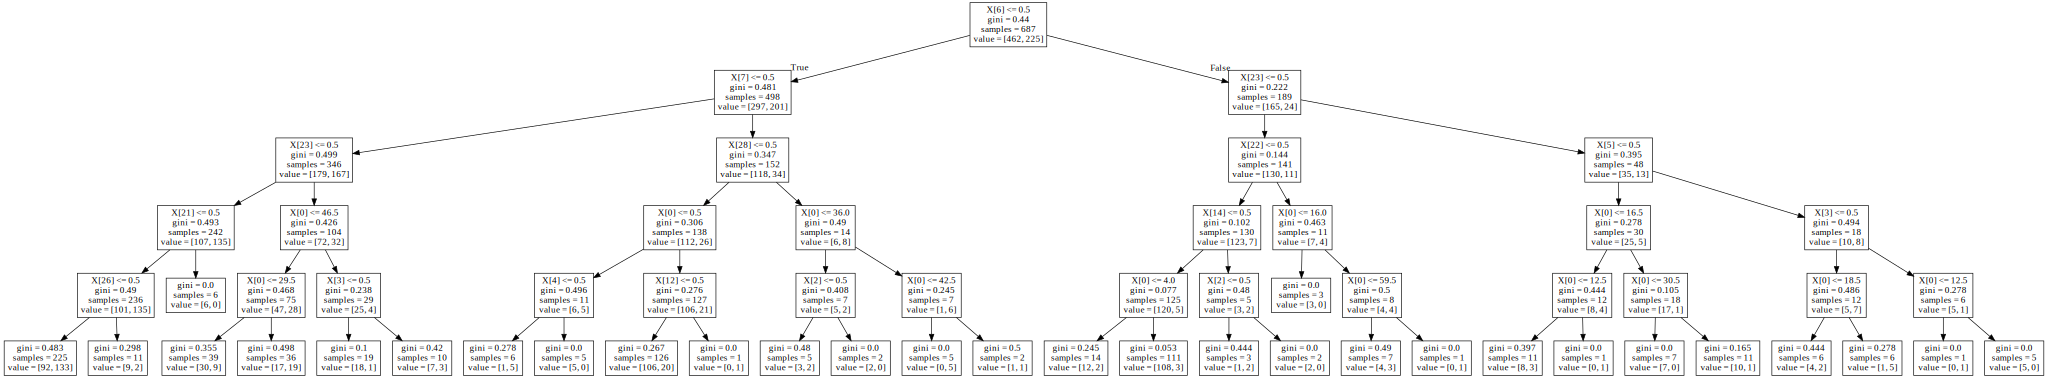

In [32]:
graph = graphviz.Source(dot_data)
graph

In [33]:
graph.render("decision_tree") 

'decision_tree.pdf'